# Analise descritiva dos dados

# Imports

In [1]:
import pandas as pd
import inflection
import math
import seaborn as sns
import datetime as dt
import numpy as np

from matplotlib import pyplot as plt
from IPython.display import Image  

# Loading Data

In [2]:
# Loading train.csv
df_sales = pd.read_csv('/home/data_science/repos/DataScience_Em_Producao/datasets/rossmann-store-sales/train.csv', low_memory=False)
# Loading store.csv
df_store = pd.read_csv('/home/data_science/repos/DataScience_Em_Producao/datasets/rossmann-store-sales/store.csv', low_memory=False)

# merge 
df_raw = pd.merge(right=df_store,left=df_sales,how='left',on='Store')


In [3]:
df_sales.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [4]:
df_raw[df_raw['Store']==1]

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1115,1,4,2015-07-30,5020,546,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
2230,1,3,2015-07-29,4782,523,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
3345,1,2,2015-07-28,5011,560,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
4460,1,1,2015-07-27,6102,612,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1011635,1,6,2013-01-05,4997,635,1,0,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1012750,1,5,2013-01-04,4486,619,1,0,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1013865,1,4,2013-01-03,4327,578,1,0,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1014980,1,3,2013-01-02,5530,668,1,0,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN


#  Rename Columns 

In [5]:
columns = df_raw.columns.to_list()

snake_case = lambda x: inflection.underscore(x)
columns = list(map(snake_case,columns))

df_raw.columns = columns

# Descricao dos Dados

In [6]:
df_1 = df_raw.copy()

## --> Data Dimension

In [7]:
print('Number of raw: {}'.format(df_1.shape[0]))
print('Number of columns: {}'.format(df_1.shape[1]))

Number of raw: 1017209
Number of columns: 18


## --> Data Types

In [8]:
df_1['date'] = pd.to_datetime(df_1['date'])
df_1.dtypes

store                                    int64
day_of_week                              int64
date                            datetime64[ns]
sales                                    int64
customers                                int64
open                                     int64
promo                                    int64
state_holiday                           object
school_holiday                           int64
store_type                              object
assortment                              object
competition_distance                   float64
competition_open_since_month           float64
competition_open_since_year            float64
promo2                                   int64
promo2_since_week                      float64
promo2_since_year                      float64
promo_interval                          object
dtype: object

## --> Check NA

In [9]:
df_1.isna().sum()

store                                0
day_of_week                          0
date                                 0
sales                                0
customers                            0
open                                 0
promo                                0
state_holiday                        0
school_holiday                       0
store_type                           0
assortment                           0
competition_distance              2642
competition_open_since_month    323348
competition_open_since_year     323348
promo2                               0
promo2_since_week               508031
promo2_since_year               508031
promo_interval                  508031
dtype: int64

In [10]:
# Porcentage (%)
df_1.isna().sum() / df_1.shape[0]

store                           0.000000
day_of_week                     0.000000
date                            0.000000
sales                           0.000000
customers                       0.000000
open                            0.000000
promo                           0.000000
state_holiday                   0.000000
school_holiday                  0.000000
store_type                      0.000000
assortment                      0.000000
competition_distance            0.002597
competition_open_since_month    0.317878
competition_open_since_year     0.317878
promo2                          0.000000
promo2_since_week               0.499436
promo2_since_year               0.499436
promo_interval                  0.499436
dtype: float64

## --> Replacing missing data

In [11]:
df_1['competition_distance'].max()

75860.0

In [12]:
#competition_distance
df_1['competition_distance'] = df_1['competition_distance'].apply(lambda x: 200000.0 if math.isnan(x) else x)         

#competition_open_since_month
df_1['competition_open_since_month'] = df_1.apply(lambda x: x['date'].month if math.isnan(x['competition_open_since_month']) else x['competition_open_since_month'], axis=1) 

#competition_open_since_year  
df_1['competition_open_since_year'] = df_1.apply(lambda x: x['date'].year if math.isnan(x['competition_open_since_year']) else x['competition_open_since_year'], axis=1) 

#promo2_since_week
df_1['promo2_since_week'] = df_1.apply(lambda x: x['date'].week if math.isnan(x['promo2_since_week']) else x['promo2_since_week'], axis=1) 
            
#promo2_since_year
df_1['promo2_since_year'] = df_1.apply(lambda x: x['date'].year if math.isnan(x['promo2_since_year']) else x['promo2_since_year'], axis=1) 

#promo_interval
month_map = {1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sept',10:'Oct',11:'Nov',12:'Dec'}

df_1['promo_interval'].fillna(0,inplace=True)

df_1['month_map'] = df_1['date'].dt.month.map(month_map)

df_1['is_promo'] = df_1[['promo_interval','month_map']].apply(lambda x: 0 if x['promo_interval'] == 0 else 1 if x['month_map'] in x['promo_interval'].split(',') else 0, axis=1)

## --> Change Dtypes

In [13]:
df_1.dtypes

store                                    int64
day_of_week                              int64
date                            datetime64[ns]
sales                                    int64
customers                                int64
open                                     int64
promo                                    int64
state_holiday                           object
school_holiday                           int64
store_type                              object
assortment                              object
competition_distance                   float64
competition_open_since_month           float64
competition_open_since_year            float64
promo2                                   int64
promo2_since_week                      float64
promo2_since_year                      float64
promo_interval                          object
month_map                               object
is_promo                                 int64
dtype: object

In [14]:
#float64 to int64
df_1['competition_open_since_month'] = df_1['competition_open_since_month'].astype(int)
df_1['competition_open_since_year'] = df_1['competition_open_since_year'].astype(int)

df_1['promo2_since_week'] = df_1['promo2_since_week'].astype(int)
df_1['promo2_since_year'] = df_1['promo2_since_year'].astype(int)

## --> Descriptive Statical

In [15]:
num_attributes = df_1.select_dtypes(include=['int64','float64'])
cat_attributes = df_1.select_dtypes(exclude=['int64','float64','datetime64[ns]'])

In [16]:
# NUMERICAL ATTRIBUTES

# Central Tendency - mean, median
t1 = pd.DataFrame(num_attributes.mean()).T
t2 = pd.DataFrame(num_attributes.median()).T

# Dispersion - std, min, max, range, skew, kurtosis
d1 = pd.DataFrame(num_attributes.std()).T 
d2 = pd.DataFrame(num_attributes.min()).T 
d3 = pd.DataFrame(num_attributes.max()).T
d4 = pd.DataFrame(num_attributes.apply(lambda x: x.max() - x.min())).T
d5 = pd.DataFrame(num_attributes.skew()).T
d6 = pd.DataFrame(num_attributes.kurtosis()).T

ml = pd.concat([d2,d3,d4,t1,t2,d1,d5,d6]).T.reset_index()
ml.columns = ['attributes','min','max','range','mean','median','std','skew','kurtosis']


In [17]:

ml

,attributes,min,max,range,mean,median,std,skew,kurtosis
0,store,1.0,1115.0,1114.0,558.429727,558.0,321.908651,-0.000955,-1.200524
1,day_of_week,1.0,7.0,6.0,3.998341,4.0,1.997391,0.001593,-1.246873
2,sales,0.0,41551.0,41551.0,5773.818972,5744.0,3849.926175,0.641460,1.778375
3,customers,0.0,7388.0,7388.0,633.145946,609.0,464.411734,1.598650,7.091773
4,open,0.0,1.0,1.0,0.830107,1.0,0.375539,-1.758045,1.090723
5,promo,0.0,1.0,1.0,0.381515,0.0,0.485759,0.487838,-1.762018
6,school_holiday,0.0,1.0,1.0,0.178647,0.0,0.383056,1.677842,0.815154
7,competition_distance,20.0,200000.0,199980.0,5935.442677,2330.0,12547.652996,10.242344,147.789712
8,competition_open_since_month,1.0,12.0,11.0,6.786849,7.0,3.311087,-0.042076,-1.232607
9,competition_open_since_year,1900.0,2015.0,115.0,2010.324840,2012.0,5.515593,-7.235657,124.071304


In [18]:
# CATEGORICAL ATTRIBUTES

cat_attributes.apply(lambda x: x.unique().shape[0])



state_holiday      4
store_type         4
assortment         3
promo_interval     4
month_map         12
dtype: int64

<AxesSubplot:xlabel='assortment', ylabel='sales'>

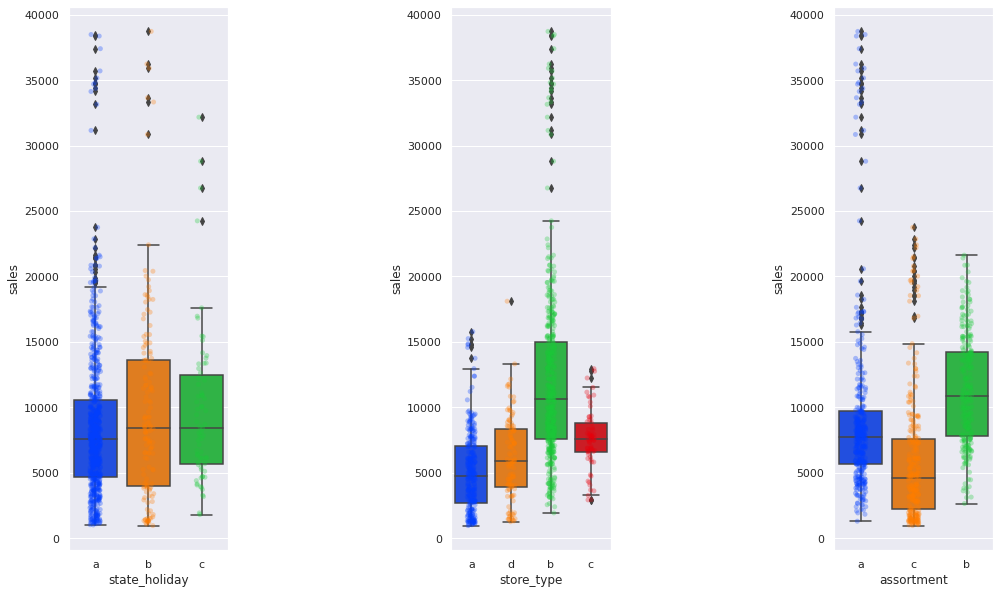

In [19]:
aux_1 = df_1[(df_1['state_holiday'] != '0') & (df_1['sales'] > 0)]

sns.set_theme(style="darkgrid", palette="bright")
plt.figure(figsize=(20,10))

plt.subplot(1,6,1)
sns.boxplot(x='state_holiday', y='sales', data=aux_1, palette='bright')
sns.stripplot(x='state_holiday', y='sales', data=aux_1, alpha=0.3) 

plt.subplot(1,6,3)
sns.boxplot(x='store_type', y='sales', data=aux_1, palette='bright') 
sns.stripplot(x='store_type', y='sales', data=aux_1, alpha=0.3) 

plt.subplot(1,6,5)
sns.boxplot(x='assortment', y='sales', data=aux_1, palette='bright') 
sns.stripplot(x='assortment', y='sales', data=aux_1, alpha=0.3) 

# Feature Engineering

## --> Mind Map das Hipoteses

In [20]:
df_2 = df_1.copy()

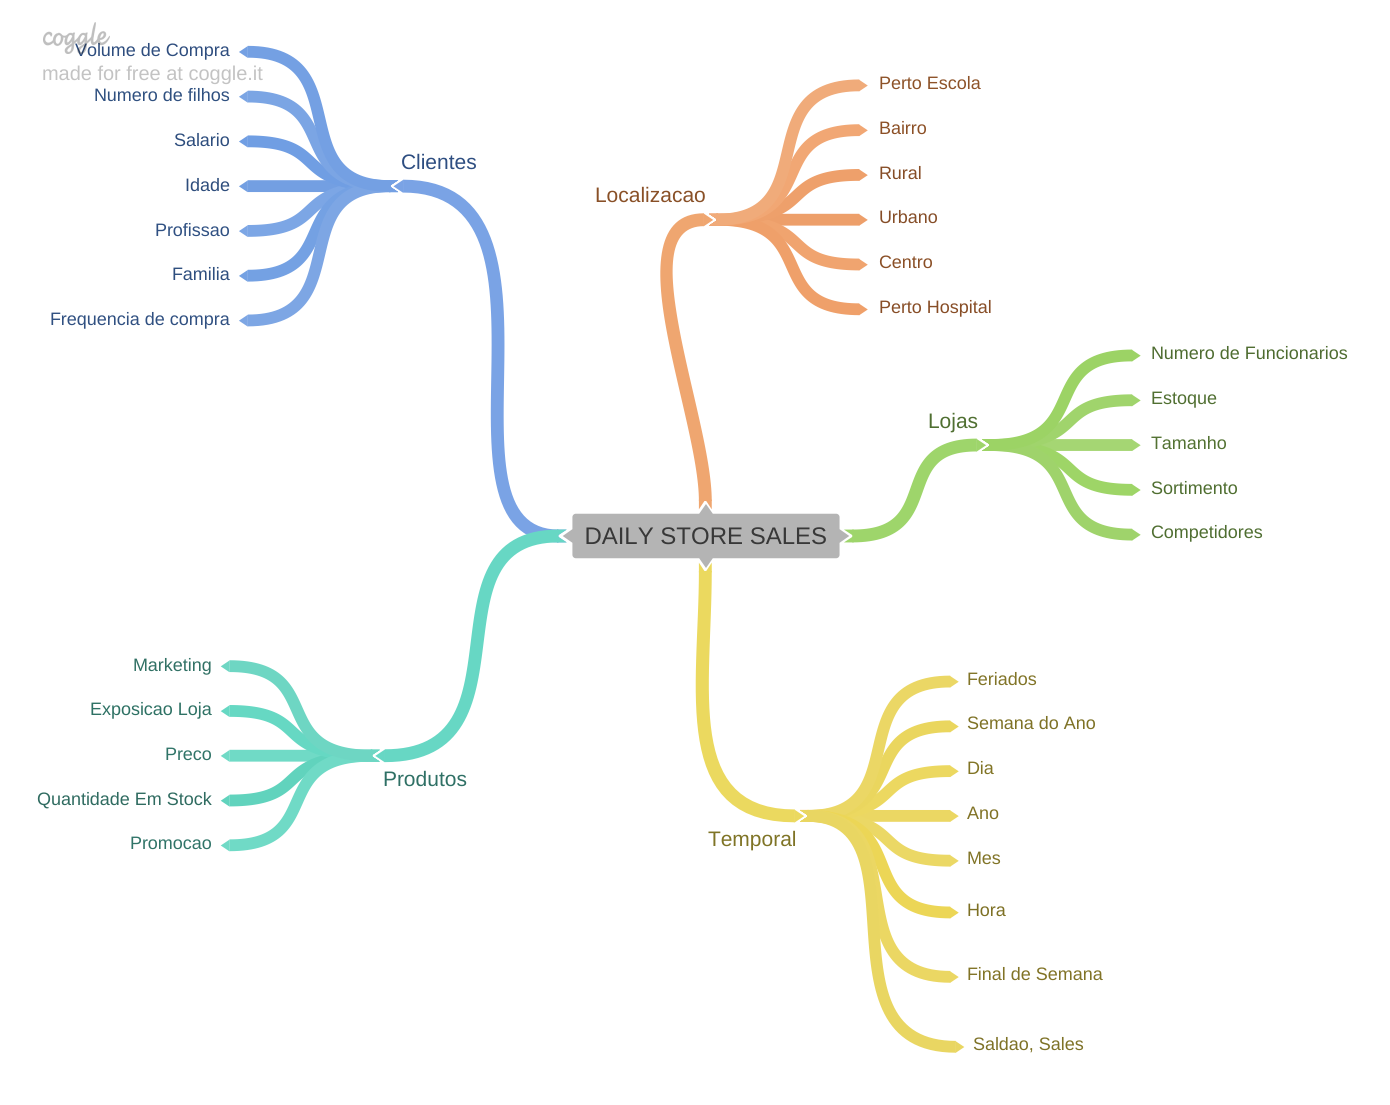

In [21]:
Image('/home/data_science/repos/DataScience_Em_Producao/img/mind_map-hypoteses.png')

## --> Criação de Hipóteses

### --> Hipóteses Loja

1. Lojas com número maior de funcionarios deveriam vender mais.
2. Lojas com maior capacidade de estoque deveriam vander mais.
3. Lojas com maior porte deveriam vender mais.
4. Lojas com maior sortimento deveriam vender mais. 
5. Lojas com competidores mais próximos deveriam vender mais.
6. Lojas com competidores à mais tempo deveriam vender mais. 

### --> Hipóteses Produto

1. Lojas que investem mais em marketing deveriam vender mais.
2. Lojas com maior exposição de produto deveriam vender mais.
3. Lojas com produtos com preço menor deveriam vender mais.
4. Lojas com promoções mais agressivas (desconto maiores), deveriam vender mais.
5. Lojas com promoções ativas por mais tempo deveriam vender mais.
6. Lojas com mais dias de promoção deveriam vender mais.
7. Lojas com mais promoções consectivas deveriam vender mais.

### --> Hipóteses Tempo

1. Lojas que tem mais feriados deveriam vender mais.
2. Lojas que abrem nos primeiros 6 meses deveriam vender mais.
3. Lojas que abrem nos finais de semana deveriam vender mais.
4. Lojas deveriam vender mais depois do dia 10 de cada mes.
5. Lojas deveriam vender menos aos finais de semana.
6. Lojas deveriam vender menos durante os feriados escolares.

### --> Lista de prioridade das Hipóteses

1. Lojas com maior sortimento deveriam vender mais. 
2. Lojas com competidores mais próximos deveriam vender mais.
3. Lojas com competidores à mais tempo deveriam vender mais.  

4. Lojas com promoções ativas por mais tempo deveriam vender mais.
5. Lojas com mais dias de promoção deveriam vender mais.
6. Lojas com mais promoções consectivas deveriam vender mais.

7. Lojas que investem mais em marketing deveriam vender mais.
8. Lojas com maior exposição de produto deveriam vender mais.
9. Lojas com produtos com preço menor deveriam vender mais.
10. Lojas com promoções mais agressivas (desconto maiores), deveriam vender mais.
11. Lojas com promoções ativas por mais tempo deveriam vender mais.
12. Lojas com mais dias de promoção deveriam vender mais.
13. Lojas com mais promoções consectivas deveriam vender mais.

## --> Feature Engineering

In [22]:
# year
df_2['year'] = df_1['date'].dt.year

# month
df_2['month'] = df_1['date'].dt.month

# week of year
df_2['week_of_year'] = df_1['date'].dt.weekofyear

# year week
df_2['year_week'] = df_1['date'].dt.strftime('%Y-%W')

# competion since 
df_2['competition_since'] = df_2.apply(lambda x: dt.datetime(year=x['competition_open_since_year'], month=x['competition_open_since_month'], day=1), axis=1)
#sub date and conpetition then convert days to month
df_2['competition_time_month'] = ((df_2['date'] - df_2['competition_since'])/30).apply(lambda x: x.days).astype(int)

# promo since 
# year - week
df_2['promo_since'] = df_2['promo2_since_year'].astype(str) + '-' + df_2['promo2_since_week'].astype(str)
# convert to string to data --> year - week - day of week
df_2['promo_since'] = df_2['promo_since'].apply(lambda x: dt.datetime.strptime(x + '-1', '%Y-%W-%w') - dt.timedelta(days=7))
#divide per 7 and get number of week
df_2['promo_since'] = ((df_2['date'] - df_2['promo_since']) / 7).apply(lambda x: x.days).astype(int)

# assortment 
df_2['assortment'] = df_2['assortment'].apply(lambda x:'basic' if x == 'a' else 'extra' if x == 'b' else 'extended')

# state holiday
df_2['state_holiday'] = df_2['state_holiday'].apply(lambda x: 'public_holiday' if x == 'a' else 'easter_holiday' if x=='b' else 'christmas' if x=='c' else 'regular_day') 


/tmp/ipykernel_3816/1919383008.py:8: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  df_2['week_of_year'] = df_1['date'].dt.weekofyear


In [23]:
# df_t =  df_2.head(1)
# #return a series
# month = (df_t['date'] - df_t['competion_since']) / 30
# #return a timedelta object and get days attributes
# month[0].days

# date = df_2.loc[0,'promo_since'] + '-1'
# new_date = dt.datetime.strptime(date,'%Y-%W-%w')
# delta = dt.datetime.strptime(date,'%Y-%W-%w') - dt.timedelta(days=7)
# print(new_date)
# print(delta)

In [24]:
df_2.head().T

,0,1,2,3,4
store,1,2,3,4,5
day_of_week,5,5,5,5,5
date,2015-07-31 00:00:00,2015-07-31 00:00:00,2015-07-31 00:00:00,2015-07-31 00:00:00,2015-07-31 00:00:00
sales,5263,6064,8314,13995,4822
customers,555,625,821,1498,559
open,1,1,1,1,1
promo,1,1,1,1,1
state_holiday,regular_day,regular_day,regular_day,regular_day,regular_day
school_holiday,1,1,1,1,1
store_type,c,a,a,c,a


In [25]:
df_2.dtypes

store                                    int64
day_of_week                              int64
date                            datetime64[ns]
sales                                    int64
customers                                int64
open                                     int64
promo                                    int64
state_holiday                           object
school_holiday                           int64
store_type                              object
assortment                              object
competition_distance                   float64
competition_open_since_month             int64
competition_open_since_year              int64
promo2                                   int64
promo2_since_week                        int64
promo2_since_year                        int64
promo_interval                          object
month_map                               object
is_promo                                 int64
year                                     int64
month        

# Filtragem de Variaveis

Identificar as restrições de negócio. (Dados que não estão disponíveis no momento da predição)

In [26]:
df_3 = df_2.copy()

In [27]:
df_3.head()

,store,day_of_week,date,sales,customers,open,promo,state_holiday,school_holiday,store_type,...,promo_interval,month_map,is_promo,year,month,week_of_year,year_week,competition_since,competition_time_month,promo_since
0,1,5,2015-07-31,5263,555,1,1,regular_day,1,c,...,0,Jul,0,2015,7,31,2015-30,2008-09-01,84,0
1,2,5,2015-07-31,6064,625,1,1,regular_day,1,a,...,"Jan,Apr,Jul,Oct",Jul,1,2015,7,31,2015-30,2007-11-01,94,279
2,3,5,2015-07-31,8314,821,1,1,regular_day,1,a,...,"Jan,Apr,Jul,Oct",Jul,1,2015,7,31,2015-30,2006-12-01,105,226
3,4,5,2015-07-31,13995,1498,1,1,regular_day,1,c,...,0,Jul,0,2015,7,31,2015-30,2009-09-01,71,0
4,5,5,2015-07-31,4822,559,1,1,regular_day,1,a,...,0,Jul,0,2015,7,31,2015-30,2015-04-01,4,0


## Filtragem das linhas 
* Ao filtrar as linhas diminuira o volume, consequentemente melhor desempenho.

In [28]:
df_3 = df_3[(df_3['sales'] > 0) & (df_3['open'] != 0)].reset_index()

## Celeção das colunas

In [29]:
df_3.drop(columns=['customers','open','promo_interval','month_map'], inplace=True)

In [30]:
df_3.shape

(844338, 24)

# Análise Exploratoria dos Dados

In [31]:
df_4 = df_3.copy()

## --> Análise Univarida

### Response Variable

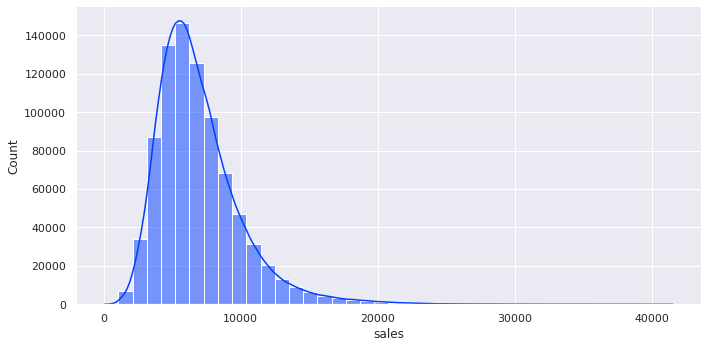

In [32]:
sns.displot(df_4['sales'],bins=40,aspect=2,kde=True)

### Numerical Variable

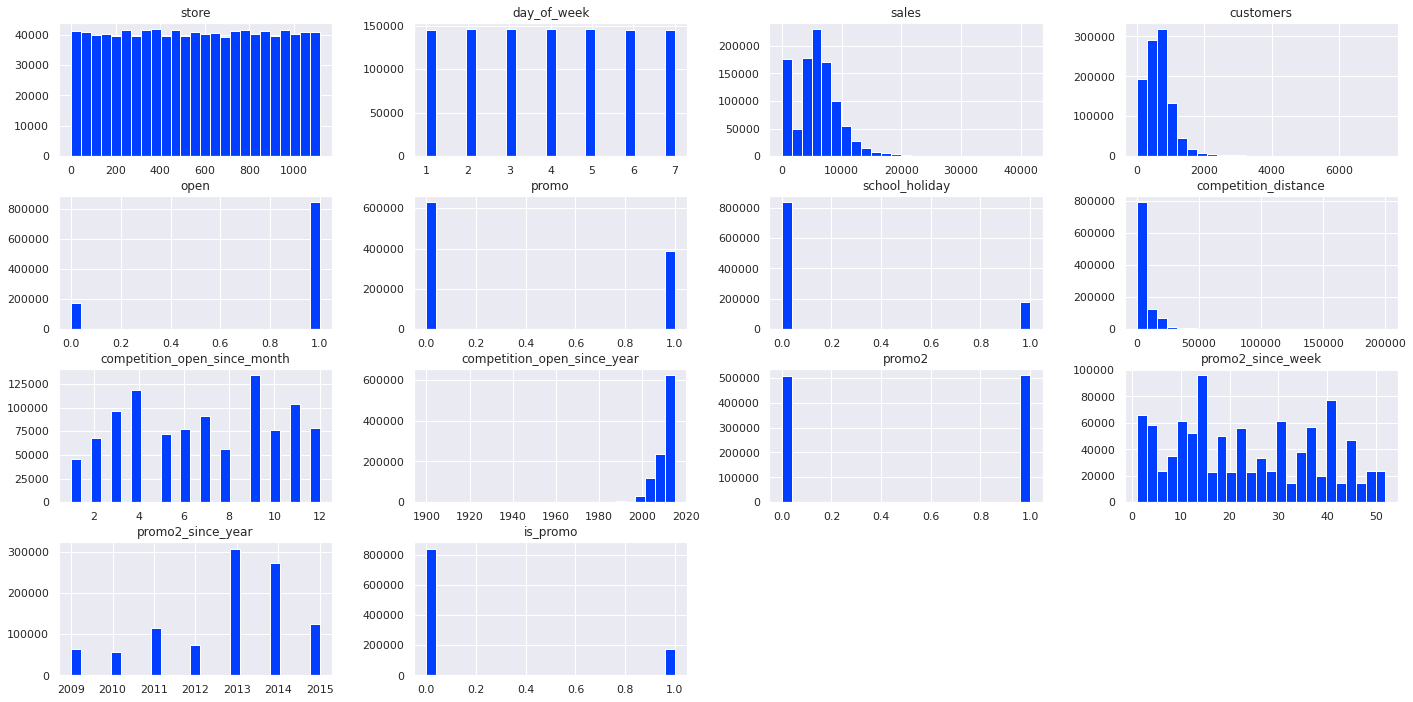

In [33]:
num_attributes.hist(bins=25,figsize=(24,12));

### Categorical Variable

/home/data_science/.pyenv/versions/3.8.8/envs/DsEmProd/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/data_science/.pyenv/versions/3.8.8/envs/DsEmProd/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/data_science/.pyenv/versions/3.8.8/envs/DsEmProd/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments wi

<AxesSubplot:xlabel='sales', ylabel='Density'>

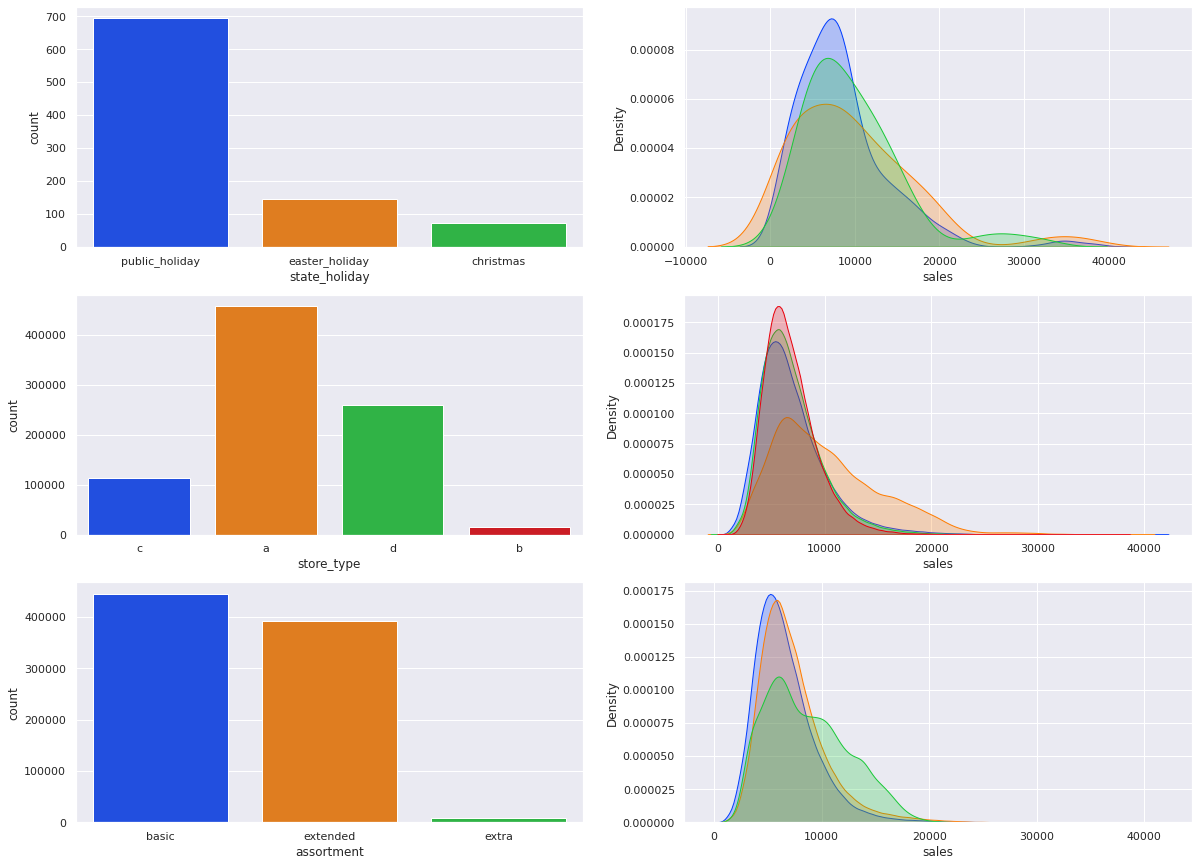

In [34]:
%matplotlib inline

# state_holiday 
holiday = df_4.loc[df_4['state_holiday']!='regular_day','state_holiday']
plt.figure(figsize=(20,15))

plt.subplot(3,2,1)
sns.countplot(holiday)

plt.subplot(3,2,2)
plt.ticklabel_format(style='plain', axis='y')
sns.kdeplot(df_4[df_4['state_holiday']=='public_holiday']['sales'],label='public_holiday',shade=True,legend='public_holiday')
sns.kdeplot(df_4[df_4['state_holiday']=='easter_holiday']['sales'],label='easter_holiday',shade=True)
sns.kdeplot(df_4[df_4['state_holiday']=='christmas']['sales'],label='christmas',shade=True)

# store_type
store_type = df_4['store_type']

plt.subplot(3,2,3)
sns.countplot(store_type)

plt.subplot(3,2,4)
plt.ticklabel_format(style='plain', axis='y')
sns.kdeplot(df_4[df_4['store_type']=='a']['sales'],shade=True)
sns.kdeplot(df_4[df_4['store_type']=='b']['sales'],shade=True)
sns.kdeplot(df_4[df_4['store_type']=='c']['sales'],shade=True)
sns.kdeplot(df_4[df_4['store_type']=='d']['sales'],shade=True)

# store_type
assortment = df_4['assortment']

plt.subplot(3,2,5)
sns.countplot(assortment)

plt.subplot(3,2,6)
plt.ticklabel_format(style='plain', axis='y')
sns.kdeplot(df_4[df_4['assortment']=='basic']['sales'],shade=True)
sns.kdeplot(df_4[df_4['assortment']=='extended']['sales'],shade=True)
sns.kdeplot(df_4[df_4['assortment']=='extra']['sales'],shade=True)



## --> Análise Bivariada

### H1. Lojas com maior sortimento deveriam vender mais. 

Falsa, lojas com MAIOR SORTIMENTO vendem MENOS. 

<AxesSubplot:xlabel='year_week'>

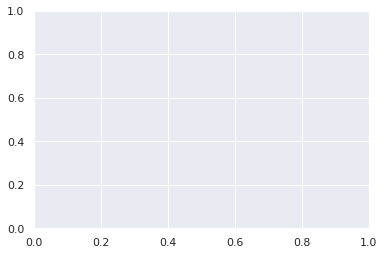

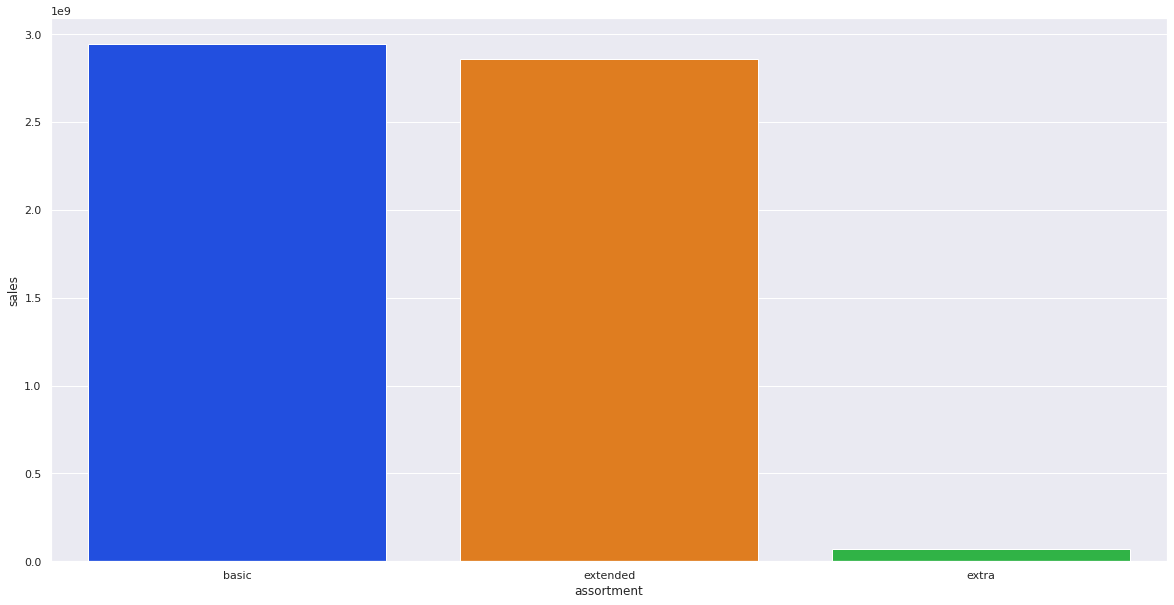

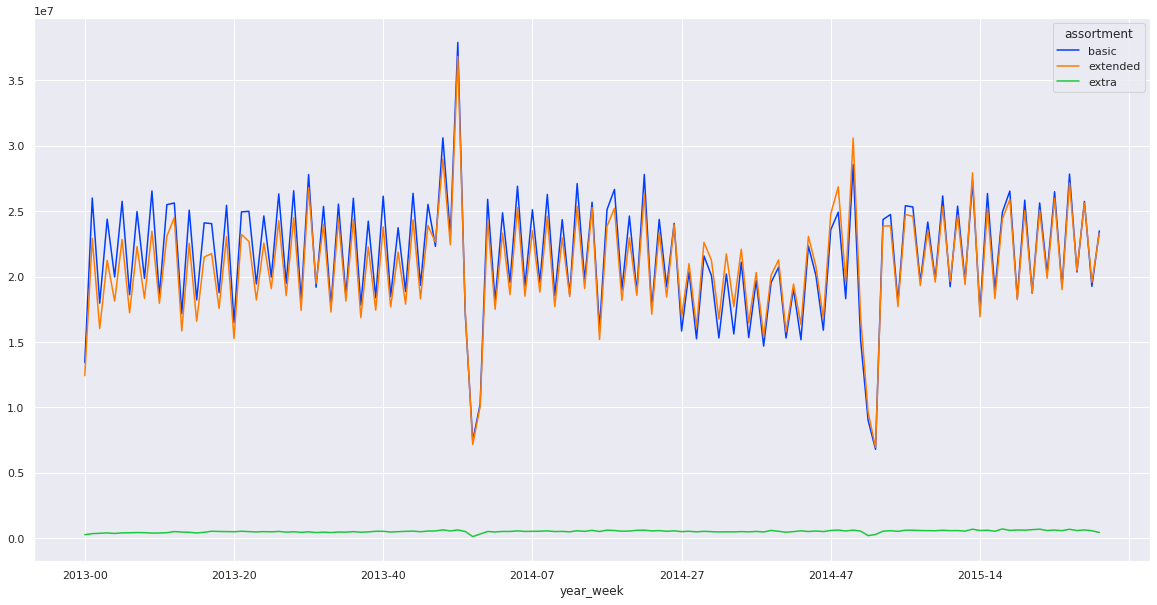

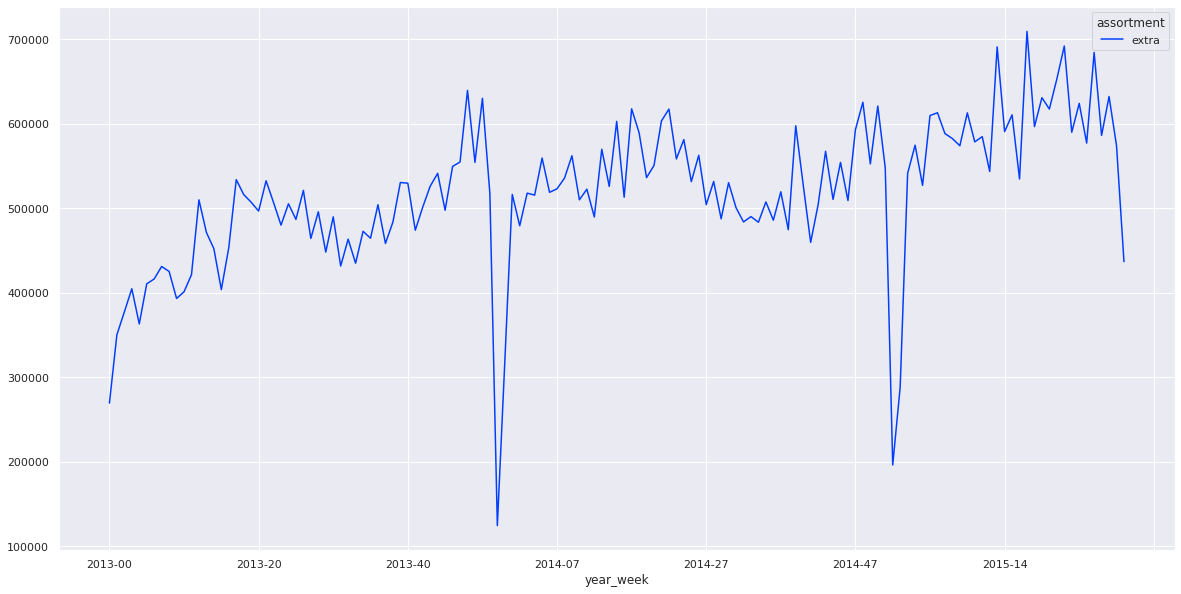

In [35]:
aux_1 = df_4[['assortment','sales']].groupby('assortment').sum().reset_index()
plt.ticklabel_format(style='plain',axis='y')

plt.figure(figsize=(20,10))
sns.barplot(x='assortment',y='sales',data=aux_1)

aux_2 = df_4[['year_week','assortment','sales']].groupby(['year_week','assortment']).sum().reset_index()

aux_2.pivot(index='year_week',columns='assortment', values='sales').plot(figsize=(20,10))

aux_3 = df_4.loc[df_4['assortment']=='extra',['year_week','assortment','sales']].groupby(['year_week','assortment']).sum().reset_index()
aux_3.pivot(index='year_week',columns='assortment', values='sales').plot(figsize=(20,10))


### H2. Lojas com competidores mais próximos deveriam vender mais.

<AxesSubplot:xlabel='competition_distance_binned', ylabel='sales'>

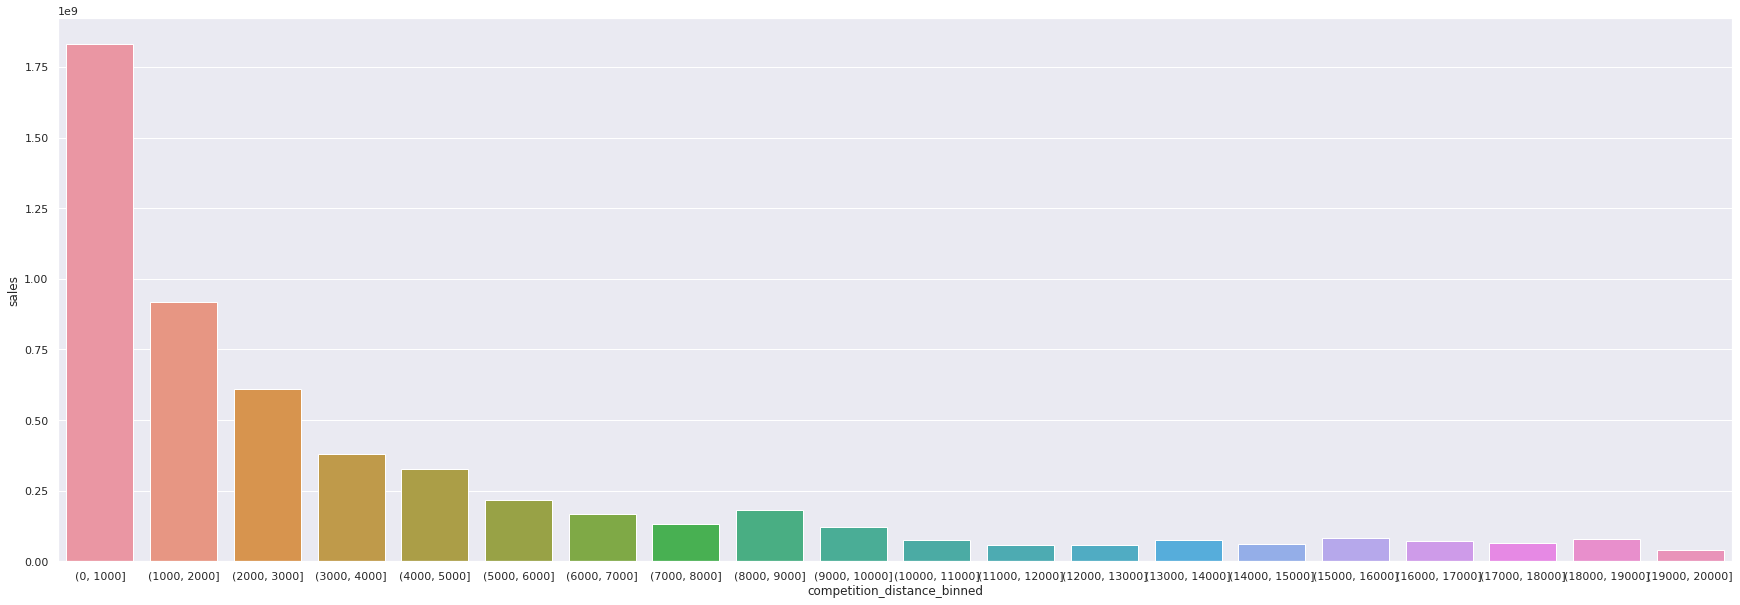

In [36]:
aux_1 = df_4[['competition_distance','sales']].groupby('competition_distance').sum().reset_index()

bins = list(np.arange(0,21000,1000))
aux_1['competition_distance_binned'] = pd.cut(aux_1['competition_distance'],bins=bins)

aux_2 = aux_1[['competition_distance_binned','sales']].groupby('competition_distance_binned').sum().reset_index()

plt.figure(figsize=(30,10))
sns.barplot(x='competition_distance_binned',y='sales',data=aux_2)

/home/data_science/.pyenv/versions/3.8.8/envs/DsEmProd/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='competition_distance_binned', ylabel='sales'>

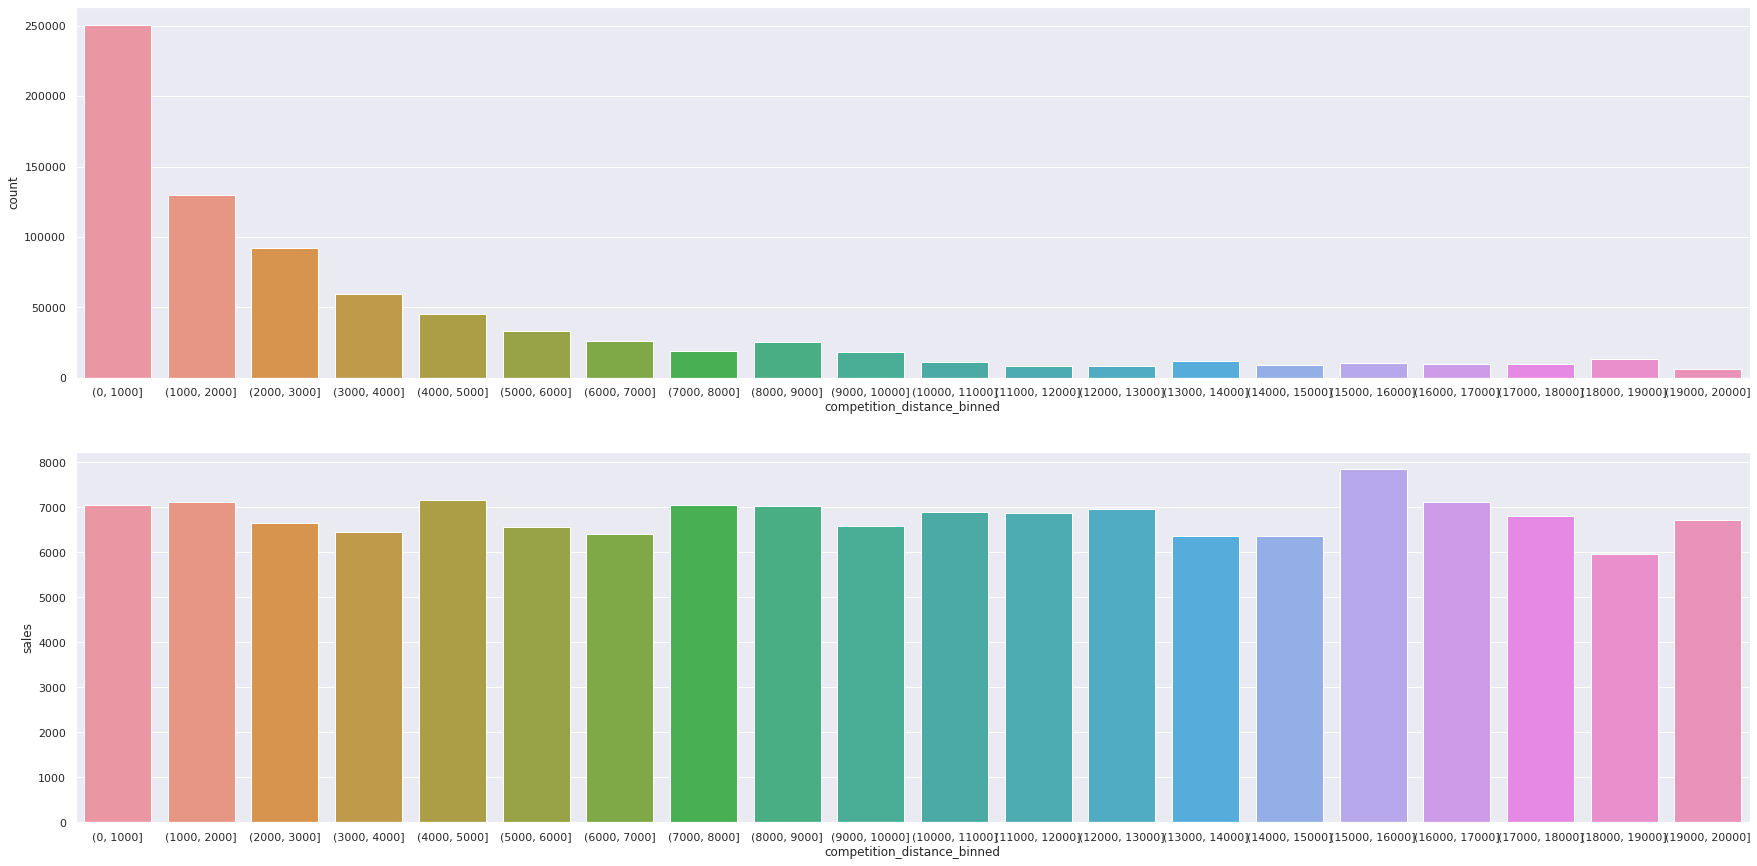

In [45]:
bins = list(np.arange(0,21000,1000))

df_4['competition_distance_binned'] = pd.cut(df_4['competition_distance'],bins=bins)

plt.figure(figsize=(30,15))

plt.subplot(2,1,1)
sns.countplot(df_4['competition_distance_binned'])

aux_1 = df_4[['competition_distance','sales']].groupby('competition_distance').mean().reset_index()
aux_1['competition_distance_binned'] = pd.cut(aux_1['competition_distance'],bins=bins)

aux_2 = aux_1[['competition_distance_binned','sales']].groupby('competition_distance_binned').mean().reset_index()

plt.subplot(2,1,2)
sns.barplot(x='competition_distance_binned',y='sales',data=aux_2)


### H3. Lojas com competidores à mais tempo deveriam vender mais.  

In [37]:
df_4.columns

Index(['index', 'store', 'day_of_week', 'date', 'sales', 'promo',
       'state_holiday', 'school_holiday', 'store_type', 'assortment',
       'competition_distance', 'competition_open_since_month',
       'competition_open_since_year', 'promo2', 'promo2_since_week',
       'promo2_since_year', 'is_promo', 'year', 'month', 'week_of_year',
       'year_week', 'competition_since', 'competition_time_month',
       'promo_since'],
      dtype='object')

## --> Análise Multivariada